In [1]:
# This jupyter notebook is prepared by David Winfield

from google.colab import files
uploaded = files.upload()

Saving startup_info_.csv to startup_info_.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("startup_info_.csv")

rows, columns = df.shape

print("The dataset contains {} rows and {} columns".format(rows, columns))

The dataset contains 923 rows and 28 columns


In [4]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000,1.000000


In [5]:
columns = df.columns

print("Attribute columns:", columns)

Attribute columns: Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'object_id', 'avg_participants', 'is_top500', 'status'],
      dtype='object')


In [6]:
df.drop(columns=["Unnamed: 0", "Unnamed: 6", "state_code.1", "object_id"], inplace=True)

In [7]:
numeric_df = df._get_numeric_data()

print(numeric_df)

      latitude   longitude  labels  age_first_funding_year  \
0    42.358880  -71.056820       1                  2.2493   
1    37.238916 -121.973718       1                  5.1260   
2    32.901049 -117.192656       1                  1.0329   
3    37.320309 -122.050040       1                  3.1315   
4    37.779281 -122.419236       0                  0.0000   
..         ...         ...     ...                     ...   
918  37.740594 -122.376471       1                  0.5178   
919  42.504817  -71.195611       0                  7.2521   
920  37.408261 -122.015920       0                  8.4959   
921  37.556732 -122.288378       1                  0.7589   
922  37.386778 -121.966277       1                  3.1205   

     age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                   3.0027                    4.6685                   6.7041   
1                   9.9973                    7.0055                   7.0055   
2           

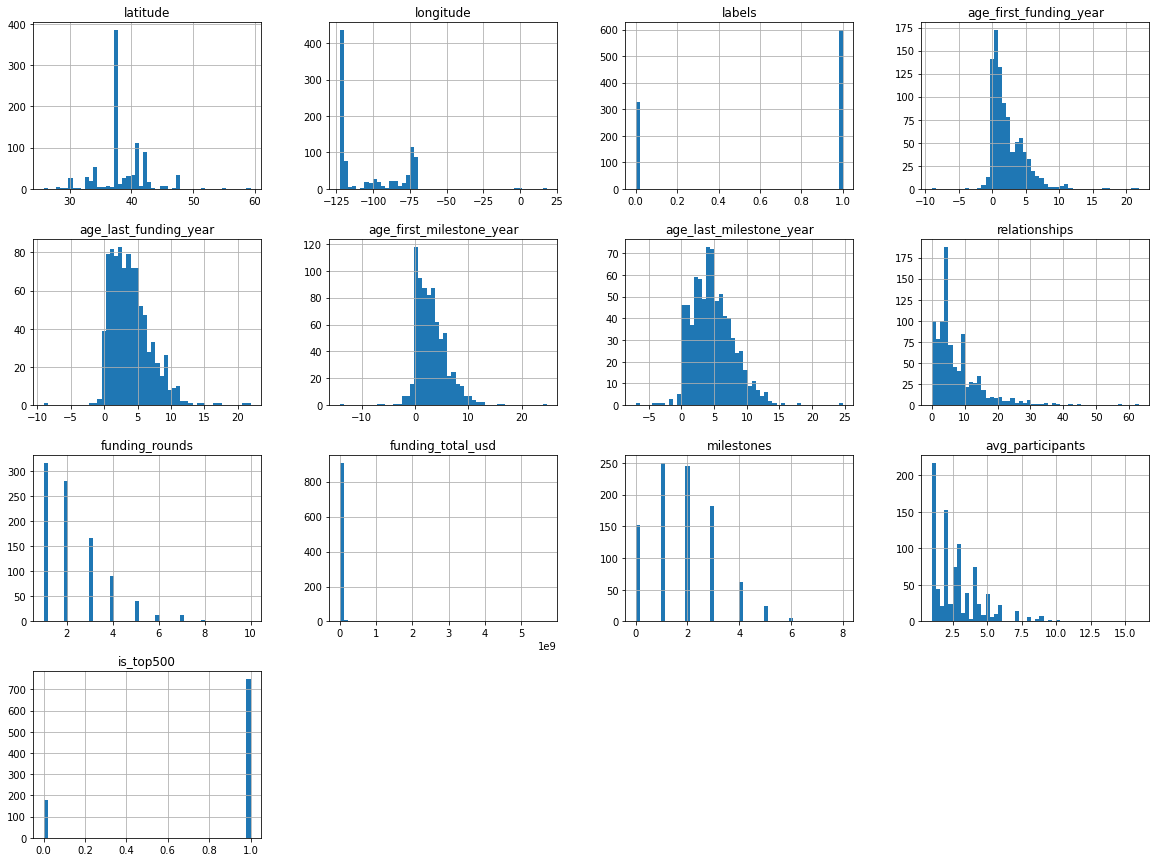

Skew of each numeric column:
latitude                     0.309298
longitude                    0.873708
labels                      -0.615290
age_first_funding_year       2.104001
age_last_funding_year        1.092075
age_first_milestone_year     0.944468
age_last_milestone_year      0.711934
relationships                2.329961
funding_rounds               1.356917
funding_total_usd           29.152461
milestones                   0.577378
avg_participants             1.767554
is_top500                   -1.577343
dtype: float64


In [8]:
numeric_df.hist(bins=50, figsize=(20, 15))

plt.show()

skew = numeric_df.skew()

print("Skew of each numeric column:")
print(skew)

In [9]:
categorical_df = df.select_dtypes(include='object')

print(categorical_df)

    state_code zip_code       id           city                  name  \
0           CA    92101   c:6669      San Diego           Bandsintown   
1           CA    95032  c:16283      Los Gatos             TriCipher   
2           CA    92121  c:65620      San Diego                 Plixi   
3           CA    95014  c:42668      Cupertino     Solidcore Systems   
4           CA    94105  c:65806  San Francisco        Inhale Digital   
..         ...      ...      ...            ...                   ...   
918         CA    94107  c:21343  San Francisco               CoTweet   
919         MA     1803  c:41747     Burlington    Reef Point Systems   
920         CA    94089  c:31549      Sunnyvale       Paracor Medical   
921         CA    94404  c:33198  San Francisco               Causata   
922         CA    95054  c:26702    Santa Clara  Asempra Technologies   

    founded_at  closed_at first_funding_at last_funding_at category_code  \
0     1/1/2007        NaN         4/1/2009     

In [10]:
missing_values = df.isna().sum().sort_values(ascending=False)

print(missing_values)

closed_at                   588
age_last_milestone_year     152
age_first_milestone_year    152
state_code                    0
age_last_funding_year         0
is_top500                     0
avg_participants              0
category_code                 0
milestones                    0
funding_total_usd             0
funding_rounds                0
relationships                 0
age_first_funding_year        0
latitude                      0
last_funding_at               0
first_funding_at              0
founded_at                    0
labels                        0
name                          0
city                          0
id                            0
zip_code                      0
longitude                     0
status                        0
dtype: int64


In [11]:
missing_values_percentage = (df.isna().mean() * 100).sort_values(ascending=False)

print(missing_values_percentage)

closed_at                   63.705309
age_last_milestone_year     16.468039
age_first_milestone_year    16.468039
state_code                   0.000000
age_last_funding_year        0.000000
is_top500                    0.000000
avg_participants             0.000000
category_code                0.000000
milestones                   0.000000
funding_total_usd            0.000000
funding_rounds               0.000000
relationships                0.000000
age_first_funding_year       0.000000
latitude                     0.000000
last_funding_at              0.000000
first_funding_at             0.000000
founded_at                   0.000000
labels                       0.000000
name                         0.000000
city                         0.000000
id                           0.000000
zip_code                     0.000000
longitude                    0.000000
status                       0.000000
dtype: float64


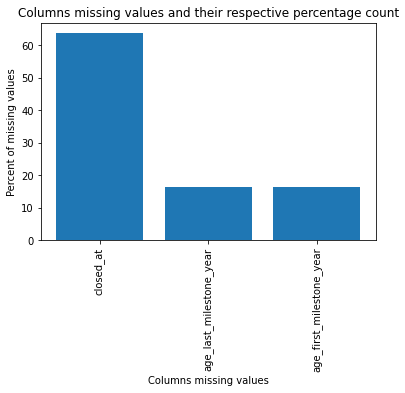

In [13]:
columns_with_missing_values = missing_values_percentage[missing_values_percentage > 0].index
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

# Plot the columns with missing values and their percentage count
plt.bar(columns_with_missing_values, missing_values_percentage)
plt.xlabel('Columns missing values')
plt.ylabel('Percent of missing values')
plt.title('Columns missing values and their respective percentage count')
plt.xticks(rotation=90)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()

df_encoded['status'] = le.fit_transform(df_encoded['status'])

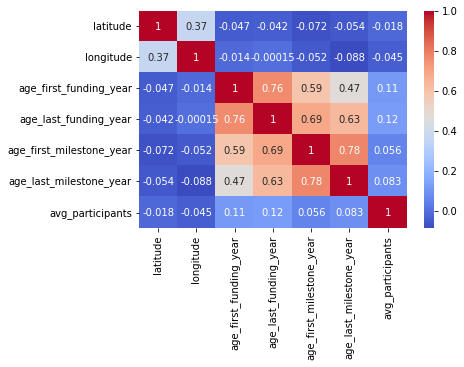

In [15]:
df_numeric = df.select_dtypes(include=['float64'])

corr = df_numeric.corr()

sb.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

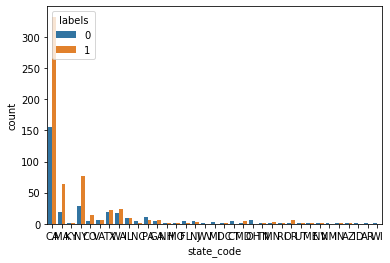

In [16]:
sb.countplot(x='state_code', hue='labels', data=df)

plt.show()

# CA produced the majority of successful startups

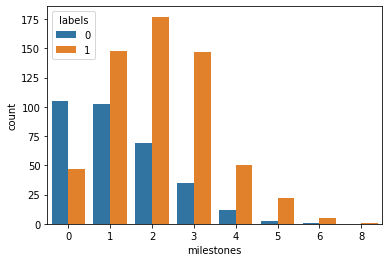

In [17]:
sb.countplot(x='milestones', hue='labels', data=df)

plt.show()
# milestone 2 made the statistically highest number of successful startups

In [18]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)

New shape: (923, 24)


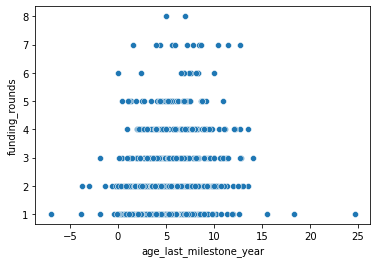

In [19]:
sb.scatterplot(x='age_last_milestone_year', y='funding_rounds', data=df)
# age of last milestone year seems to have higher correlation with number of funding rounds

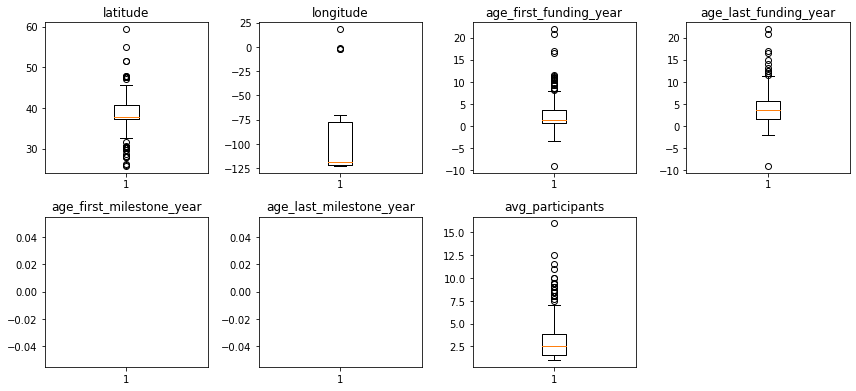

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

numeric_features = df_numeric.select_dtypes(include=[np.number])

for i, col in enumerate(numeric_features.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(numeric_features[col])
    plt.title(col)

plt.tight_layout()
plt.show()
